In [15]:
#!pip install --use-feature=2020-resolver quantstats

In [119]:
import investpy as ip
from datetime import datetime
from tqdm import tqdm
import pandas as pd
import quantstats as qs
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [120]:
today = datetime.today().date().strftime('%d/%m/%Y')
#start_of_year = f'1/1/{datetime.today().date().year}'
start_of_year = '15/3/2020'

### Define portfolio

In [121]:
#== Felipe ==#
stocks = {'BBDC4':54,
         'PETR4':600,
         #'CMIN3':34,
         'CYRE3':200,
         #'MGLU3':200
         }

etfs = {'Fundo de Invest Ishares SP 500':258}



In [125]:
def get_asset_time_series(stocks=stocks, etfs=etfs):

    assets = list(stocks.keys()) + list(etfs.keys())
    assets_time_series = pd.DataFrame([],columns=assets)
    assets_time_series
    
    for asset in assets:

        try:
            if asset in stocks.keys():

                assets_time_series[asset] = ip.get_stock_historical_data(asset,
                                                                      country='brazil', 
                                                                      from_date=start_of_year,
                                                                      to_date=today).Close

            elif asset in etfs.keys():

                assets_time_series[asset] = ip.get_etf_historical_data(asset,
                                                                    country='brazil', 
                                                                    from_date=start_of_year, 
                                                                    to_date=today).Close
            else:
                pass

            #Multiply by asset amount
            assets_time_series[asset] *= stocks[asset] 

        except:
            pass
    return(assets_time_series)
    

In [126]:
assets_time_series = get_asset_time_series()
assets_time_series.tail()

,BBDC4,PETR4,CYRE3,Fundo de Invest Ishares SP 500
Date,,,,
2021-05-24,1396.44,15834.0,4434.0,242.50
2021-05-25,1389.42,15504.0,4528.0,242.43
2021-05-26,1421.28,15654.0,4656.0,241.50
2021-05-27,1429.92,15546.0,4652.0,240.60
2021-05-28,1433.16,16194.0,4740.0,238.90


In [127]:
portfolio_value = assets_time_series.apply(lambda x: sum(x), axis=1)
portfolio_value.tail()

Date
2021-05-24    21906.94
2021-05-25    21663.85
2021-05-26    21972.78
2021-05-27    21868.52
2021-05-28    22606.06
dtype: float64

In [128]:
portfolio_returns = portfolio_value.pct_change()#.dropna()
portfolio_returns.head()

Date
2020-03-16         NaN
2020-03-17   -0.000916
2020-03-18   -0.148592
2020-03-19    0.077726
2020-03-20   -0.026746
dtype: float64

### Analyze current portfolio

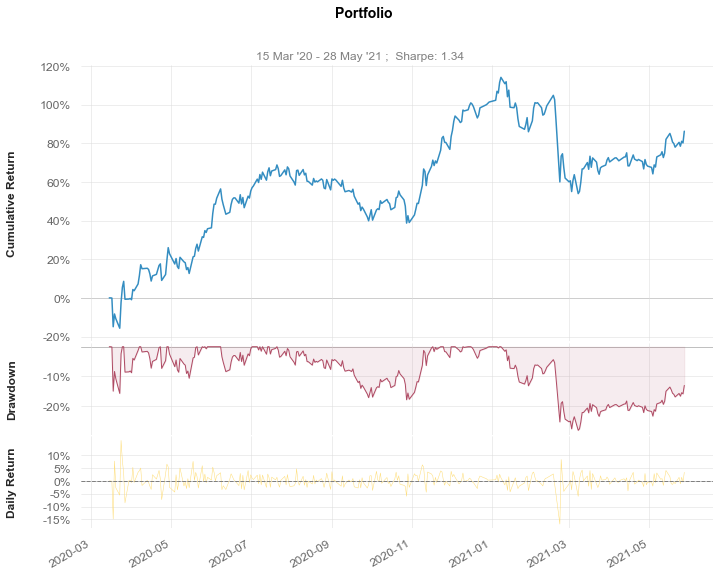

In [129]:
qs.plots.snapshot(portfolio_returns, title='Portfolio')

In [130]:
#Benchmark
bench = assets_time_series['Fundo de Invest Ishares SP 500'].pct_change()

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2020-03-16  2020-03-16
End Period                 2021-05-28  2021-05-28
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          86.26%      84.88%
CAGR%                      67.92%      66.88%

Sharpe                     1.34        2.13
Sortino                    1.96        3.65
Sortino/√2                 1.39        2.58

Max Drawdown               nan%        -21.7%
Longest DD Days            -           -
Volatility (ann.)          47.74%      25.88%
R^2                        0.01        0.01
Calmar                     2.42        6.76
Skew                       -0.46       0.74
Kurtosis                   7.16        2.98

Expected Daily %           0.21%       0.21%
Expected Monthly %         4.23%       4.18%
Expected Yearly %          36.48%      35.97%
Kelly Criterion            4.93%     

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-01-11,2021-03-08,2021-05-28,137,-28.106735,-27.601781
2,2020-07-22,2020-10-28,2020-11-17,118,-17.832678,-17.656471
3,2020-03-17,2020-03-23,2020-03-25,8,-15.701105,-14.937159
4,2020-04-30,2020-05-15,2020-05-21,21,-10.598669,-9.006063
5,2020-03-27,2020-04-01,2020-04-07,11,-8.754786,-8.537429


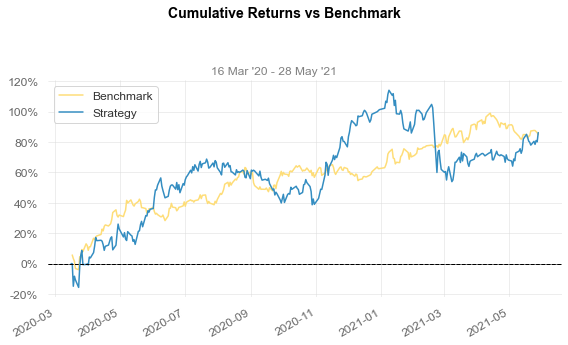

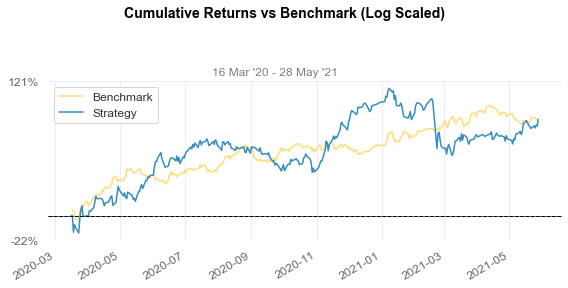

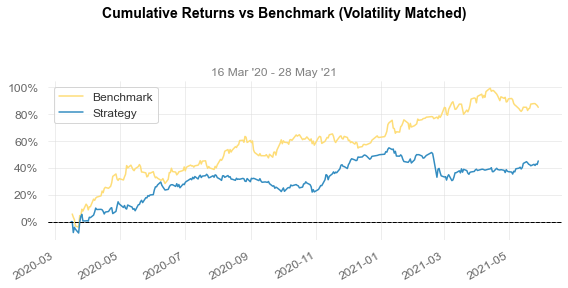

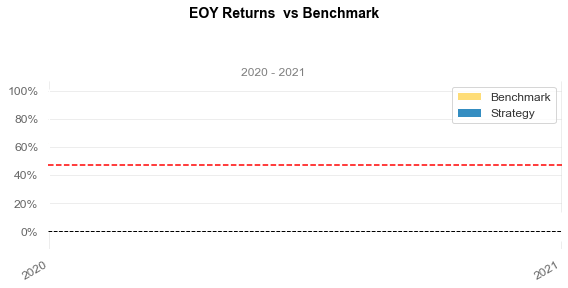

AttributeError: module 'seaborn' has no attribute 'histplot'

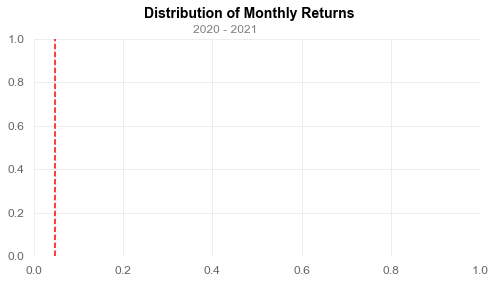

In [131]:
#Analysis of current portfolio
qs.reports.full(portfolio_returns, benchmark=bench)

In [144]:
#Liquid candidates
temp = ip.get_stocks_overview('brazil', n_results=700)
liquidity_threshold = np.quantile(temp.turnover, .75) #75-th percentile
candidates = temp[temp.turnover >= liquidity_threshold]
candidates = dict(candidates.symbol: 100)

SyntaxError: invalid syntax (<ipython-input-144-4a8a1255838f>, line 5)

In [145]:
candidates

{0: 'ABCB4',
 1: 'AGRO3',
 2: 'RAIL3',
 4: 'ALPA4',
 5: 'ALSO3',
 6: 'AMAR3',
 7: 'ABEV3',
 9: 'BBAS3',
 10: 'BBDC3',
 11: 'BBDC4',
 12: 'BBRK3',
 13: 'BEEF3',
 14: 'BPAN4',
 16: 'BRAP4',
 17: 'BRFS3',
 20: 'BRKM5',
 21: 'BRML3',
 22: 'BRPR3',
 23: 'BRSR6',
 24: 'OIBR3',
 25: 'OIBR4',
 26: 'BTOW3',
 27: 'B3SA3',
 31: 'CCRO3',
 34: 'CESP6',
 37: 'CIEL3',
 38: 'CMIG3',
 39: 'ABCB4',
 41: 'CPFE3',
 42: 'CPLE3',
 43: 'ABCB4',
 45: 'CSAN3',
 46: 'CSMG3',
 47: 'CSNA3',
 50: 'CYRE3',
 52: 'DIRR3',
 53: 'DTEX3',
 54: 'ECOR3',
 56: 'ELET3',
 57: 'ELET6',
 58: 'EMBR3',
 59: 'ENBR3',
 61: 'EQTL3',
 62: 'ABCB4',
 63: 'ETER3',
 65: 'EVEN3',
 66: 'EZTC3',
 68: 'FHER3',
 69: 'TASA4',
 70: 'FLRY3',
 72: 'GFSA3',
 74: 'GGBR4',
 76: 'GOAU4',
 77: 'GOLL4',
 78: 'GRND3',
 80: 'HBOR3',
 81: 'HGTX3',
 82: 'PRIO3',
 83: 'HYPE3',
 84: 'ABCB4',
 85: 'IGTA3',
 86: 'MEAL3',
 90: 'ITSA4',
 91: 'ITUB3',
 92: 'ITUB4',
 93: 'JBSS3',
 95: 'JHSF3',
 98: 'KLBN4',
 99: 'LAME3',
 100: 'LAME4',
 101: 'LEVE3',
 102: 'LIGT3

In [141]:
sample_size = 100
candidates = candidates[0:sample_size]
candidates

{'candidates': 100}

In [113]:
# Candidate stocks prices
candidates_df = pd.DataFrame([],columns=candidates)
candidates_df

,ABCB4,AGRO3,RAIL3,ALPA4,ALSO3,AMAR3,ABEV3,BBAS3,BBDC3,BBDC4,...,POSI3,PSSA3,PTBL3,ENAT3,QUAL3,RAPT4,RENT3,ROMI3,SANB11,SBSP3


### Loop over all stocks

In [114]:
def new_portfolio(new_stock_prices, new_stock_amount, cp_prices = portfolio_value):
    return(cp_prices + new_stock_prices * new_stock_amount)

In [115]:
#Current portfolio performance#
current_perf = qs.stats.sortino(portfolio_value)
current_perf

1.960683023526182

In [117]:
opt_new_stock, opt_new_port, opt_perf, log = None, None, -np.inf, []

for c in tqdm(candidates_df.columns):
    
    candidate_stock_price = candidates_df[c]
    candidate_portfolio = new_portfolio(candidate_stock_price, new_stock_amount=100)
    candidate_portfolio_returns = candidate_portfolio.pct_change()
    perf = qs.stats.sortino(candidate_portfolio_returns)
    
    if perf > opt_perf:
        opt_new_stock = c
        opt_new_port = candidate_portfolio
        opt_perf = perf
    
    log.append(perf)

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]


TypeError: '<' not supported between instances of 'Timestamp' and 'str'

In [ ]:
output = pd.DataFrame([], columns = ['sharpe','sortino'])
output

In [ ]:
for c in tqdm(candidates_df.columns):
    
    candidate_stock_price = candidates_df[c]
    time_in_mkt = len(candidate_stock_price.dropna())/len(candidates_df)
    
    #Only considered stocks that have been in the market for at least 99% of time
    if time_in_mkt >= 0.99:
    
        candidate_portfolio = new_portfolio(candidate_stock_price, new_stock_amount=100)
        candidate_portfolio_returns = candidate_portfolio.pct_change()
        output.loc[c, 'sharpe'] = qs.stats.sharpe(candidate_portfolio_returns)
        output.loc[c, 'sortino'] = qs.stats.sortino(candidate_portfolio_returns)
    
    else:
        pass

In [ ]:
output.sort_values('sortino', ascending=False).head(10)

In [ ]:
output.sort_values('sharpe', ascending=False).head()

In [ ]:
#== Make best new portfolio ==#
best_new_stock_index = 0
best_new_stock = output.sort_values('sortino', ascending=False).index[best_new_stock_index]
best_new_stock_prices = candidates_df[best_new_stock]
best_new_portfolio = new_portfolio(best_new_stock_prices, new_stock_amount=100)
print(best_new_stock)

In [ ]:
qs.plots.snapshot(best_new_stock_prices, title=f'{best_new_stock} Performance')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist(output.sortino)
plt.axvline(x=current_perf, c='red');

In [ ]:
qs.reports.full(best_new_portfolio, benchmark=current_portfolio_returns)

In [ ]:
qs.plots.rolling_sharpe(best_new_portfolio, period=60)

In [ ]:
qs.plots.rolling_sortino(best_new_portfolio, period=60)